# Introduction

In [1]:
from infrared import *
from infrared.rna import *

In [2]:
target = "((((((((((...))))((((....))))))))))"
model = Model(len(target), 4)
model.add_constraints(BPComp(i,j) for (i,j) in parse(target))
sampler = Sampler(model)
samples = [sampler.sample() for _ in range(10)]

In [3]:
sequences = [ass_to_seq(x) for x in samples]
sequences

['UGAUUUUUUGGGGCGGGAUAGUCUGCUAUAGGUCA',
 'CCUGCGGUGUCUAGUGCGUCGAUUGUGAUCGCAGG',
 'UGGAUGGGCCCACGGUUUGGGCGUUCUUGCAUUUG',
 'AGGGUUCUUUACUAAAGGGUAGACAUAUCAACUCU',
 'UUAGUCAAUCGUAGAUUAUAUGGUAAUGUGAUUAG',
 'UGGCUGGACAGCUUGUUGGUUGGAGGGUUCAGUCA',
 'UUCCAUCAACCAGGUUGUAUGACGAUAUGGUGGAG',
 'CGUACAAUGAGGGUCGUGGGACGAGUCUCUGUACG',
 'AUGGAUGUCUCCGGGAUGGUGUAUUUGUCAUCUAU',
 'GUAUUCUUGCACAGCAGCGUGUGGACGCGGAGUAU']

We are going to visualize the nucleotide frequencies of the sampled sequences 
if module ```logomaker``` is availabe.
(e.g. install by ```conda install logomaker```)

In [4]:
def draw_logo(samples,name=None):
    import logomaker as lm
    import matplotlib.pyplot as plt
    
    sequences = [ass_to_seq(x) for x in samples]
    
    matrix = lm.alignment_to_matrix(sequences = sequences)
    logo = lm.Logo(matrix)
    logo.style_xticks(rotation=90, fmt='%d', anchor=0)
    logo.ax.xaxis.set_ticks_position('none')
    if name is not None:
        plt.savefig(name)
    plt.show()
    logo.ax.xaxis.set_tick_params(pad=-1)
    return sequences

def opt_draw_logo(samples,name=None):
    try:
        draw_logo(samples,name)
    except ModuleNotFoundError:
        pass
    return [ass_to_seq(x) for x in samples]


opt_draw_logo(samples)

['UGAUUUUUUGGGGCGGGAUAGUCUGCUAUAGGUCA',
 'CCUGCGGUGUCUAGUGCGUCGAUUGUGAUCGCAGG',
 'UGGAUGGGCCCACGGUUUGGGCGUUCUUGCAUUUG',
 'AGGGUUCUUUACUAAAGGGUAGACAUAUCAACUCU',
 'UUAGUCAAUCGUAGAUUAUAUGGUAAUGUGAUUAG',
 'UGGCUGGACAGCUUGUUGGUUGGAGGGUUCAGUCA',
 'UUCCAUCAACCAGGUUGUAUGACGAUAUGGUGGAG',
 'CGUACAAUGAGGGUCGUGGGACGAGUCUCUGUACG',
 'AUGGAUGUCUCCGGGAUGGUGUAUUUGUCAUCUAU',
 'GUAUUCUUGCACAGCAGCGUGUGGACGCGGAGUAU']

### Multiple targets

In [5]:
#           01234567890123456789012345678901234
targets = ["((((((((((...))))((((....))))))))))",
           "((((((.((((((((....))))..))))))))))",
           ".((((((...)))))).(((((((....)))))))"]

In [6]:
for target in targets:
    model.add_constraints(BPComp(i,j) for (i,j) in parse(target))

In [7]:
sampler = Sampler(model)
designs = [sampler.sample() for _ in range(10)]

samples = [x for x in designs]
opt_draw_logo(samples)

['CCUUUAGUCUCUGAGGCUCUUUGCCGGGGUGGAGG',
 'GGAGGUUGGGGGUUUUGGGGGAUGACCUCAUCUCU',
 'CUUUUAGUUUCUAGAGUUUUUUAUAGAAAUAGAAG',
 'UCUCGUAUUUUACGGGUCUUUGUCGGAGGACGAGG',
 'UUUCAUGUUCCAUGGGCCCUUAUUGGGGGAUGGGG',
 'CUUUUGGUUCUUGGAGCCUUUUGUUGGGGUGGGGG',
 'UUUUGUAUUUUAUGGGUUUUUGUUGAGGAGCAAAG',
 'GGGGGAUGGGAUUUCUGGAGGGGGUUCUCUCUCUU',
 'UUUUAUGUUCCGUGGGUUUUCGCUAGGAAGUGGGG',
 'UUCUGUAUUUUACAGAUCUUUGUCUAAGGGUAGAG']

# Methods

## Elementary use of Infrared

In [8]:
n = 35

In [9]:
model = Model(n,4)

In [10]:
target = "((((((((((...))))((((....))))))))))"
model.add_constraints(BPComp(i,j) for (i,j) in parse(target))

In [11]:
sampler = Sampler(model)
samples = [sampler.sample() for _ in range(10)]

opt_draw_logo(samples)

['UGCAUGAUGAUGUUCAUGCUGUCACUGGCCAUGUA',
 'CUUGGUAUUUCAUGAGUCGGGACGUCCCGGCCAGG',
 'AUGUACCCUCGGUGGGGUGUUAUCGGGCGGUGCAU',
 'CAUCUUAGGUGUAGUUUAGAGAGAAUUUUAAGAUG',
 'AUACGGAAGGCACCCUUUUCGCGGGUGAACCGUAU',
 'UUUUGUAUGAUAGUUAUCGUCUUAUGGUGACGGGA',
 'CGAUGCCCCGAGGUGGGUUUGGGUGCAGAGUGUUG',
 'CGGGGUCUUUUAGGAGGUCGGGUUACCGGGCCCCG',
 'CAAUGCUCGUCAGGCGAGGCAUCCCUGCCGUGUUG',
 'UUGGCCGUGGGAUUUACAUGACUCGUCAUGGCCGA']

## Sequence constraints in IUPAC code

In [12]:
iupac_sequence = "SNNNNNNNNNRYYNNNNNNNNGNRANNNNNNNNNS"

In [13]:
for i, x in enumerate(iupac_sequence):
    model.add_constraints(ValueIn(i, iupacvalues(x)))

In [14]:
sampler = Sampler(model)
samples = [sampler.sample() for _ in range(20)]

opt_draw_logo(samples)

['GUGUAGAUGUGCCAUAUGAUGGCAAUGUUCUGCGC',
 'CGGCCAAUCGGUCUGGUUGCAGCAAUGCGUGGCUG',
 'CGUGAAGUGUGCUACAUUGGAGUAAUUUGUUCGCG',
 'CUGGGGUGUUAUCAGCGUCUGGAGAUAGGUUCCGG',
 'GCCCAGGUAGGCUCUAUCUCCGCAAGGAGUUGGGC',
 'CGUGUUACGCGCCGUGUGUUGGCAAUGACGACGUG',
 'CGAUUGGUUGGCUCAAUUCUGGUAACAGGUGGUCG',
 'GGUCCGUCGUGCUGCGAUCCCGUAAGGGGUGGACC',
 'CGAUAAAUUUGCCGGAUGUAGGUAACUACUUAUUG',
 'GAUUCUUAAAACCUUUAGUGUGAAAAUGUGGAAUC',
 'GGUGACCGUUAUUAGUGAUGAGGAAUUAUGUUGUC',
 'CUAGUAGUAUACUAUGCGUGUGAGAACACUGCUGG',
 'CCAUAUUUUAGUCUGGGUGGGGUGACUUGAUGUGG',
 'CGGAGUGCGCACCGUGCCAAUGGAAAUUGAUUCUG',
 'CGCUUCUGCGACUUGCAAUGGGCGAUUGUGGAGUG',
 'CACUAGAUGUAUUAUGUGUGCGAAAGUGUCUGGUG',
 'GGACUUAUUGAUUUAAUCGGGGGAAUUUGAAGUCC',
 'CGGACGAGUUAUUGGUUGUCAGCAAUGAUCGUCCG',
 'CGCUGGCCUGGCCUAGGGUUGGAGACGGCUCGGCG',
 'GUAUGAUCGUGCUGUGAGUACGAAAGUAUUUGUAC']

## Control of GC content

In [15]:
# add functions for GC control
model.add_functions([GCCont(i) for i in range(n)], 'gc')

In [16]:
# set a weight and sample
model.set_feature_weight(0.15, 'gc')

sampler = Sampler(model)
samples = [sampler.sample() for _ in range(1000)]
opt_draw_logo(samples)

['GGGGGAUGUAAUCUGCGUCAGGGAACUGGUUUCCC',
 'CUACGAGGGAGCCUUUUGGGGGGGAUUUUUUGUGG',
 'GGGGUUGGUUAUCGACCCGUUGGGAAGCGAACCCC',
 'CUGGGGCCUCACUGGGGUUUGGUGAUGGAUUUCAG',
 'CCCGUGUGCGAUCCGCGGGUGGAGAUAUUCAUGGG',
 'CGUUUGGUUAACUUAACGUAGGAGAUUGUUAGGCG',
 'GGCUUGGUCGAUUUGACGACGGAAAUGUUUGGGCC',
 'GUUCGUUAGCGUCGCUAUCUCGGAAGGGAGCGGGC',
 'GGCGCUAAGCGCUGUUUUGCAGGAAUGCGGGCGCC',
 'GUCAGUGACAAUUUGUCAUGCGUAAGUGUGUUGAC',
 'GUGACGGUUGGUCCGACGGUGGGGAUGCCCGUUAC',
 'GGGGUGCGGUACCGCUGGGCGGUGACGUCCGUUUC',
 'GUGUACUUUUAUCGAAACAAGGUAACUUGGUGCGC',
 'GAAGGGCGCGGCUCGUGUGCGGAGACGCGUCCUUC',
 'GGGCUCGUGCGCCGCAUAUGAGGAAUCGUGGGUCC',
 'CGUGGUUCGGGUUUUGAGAUCGUGAGAUCAUUGUG',
 'CCAGUCCGAUGCUGUCGGUCAGAAAUGGCGACUGG',
 'CCGGUCCGAGGUCUUUGUUUGGUGACGGAGGUUGG',
 'GGUGUUGUUGAUUUAGUUGGCGUAAGCUGAAUACC',
 'GAUGGCGGUGACCCGUCACUAGCGAUAGUGCUGUC',
 'CUUUGAGGCGACCUGCCUGUCGCAAGGCGUCAGGG',
 'GAUGACAGGUAUCGCCUUAAUGCGAAUUGGUUGUC',
 'CUUGGGUGUCACUGACGAUUAGCAAUGGUUUUAAG',
 'GGGAACUCUGACUCGGAGCCUGUGAGGGCGUUCUC',
 'CAAUGUGGGCGCUGCUUACCCGCAAGGGUACGUUG',


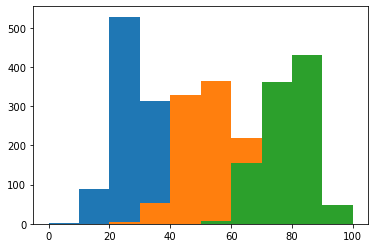

In [17]:
## Code to produce the figures in the paper
WRITEFIGS = False
for name,weight in [('minus', -1), ('zero', 0), ('plus', 1)]:
    
    model.set_feature_weight(weight, 'gc')
    sampler = Sampler(model)
    samples = [sampler.sample() for _ in range(1000)]

    sequences = opt_draw_logo(samples, f"gc_content_{name}-logo.svg")

    gc_contents = [100*sum(x in "GC" for x in sequence)/len(sequence) for sequence in sequences]
    import matplotlib.pyplot as plt
    h = plt.hist(gc_contents,bins=10,range=(0,100))
    if WRITEFIGS:
        plt.savefig(f"gc_content_{name}-hist.svg")

Set a target of 75% GC content and then draw targeted samples

In [18]:
sampler = Sampler(model)

sampler.set_target( 0.75 * n, 0.01 * n, 'gc' )

samples = [sampler.targeted_sample() for _ in range(1000)]
sequences = opt_draw_logo(samples)

gc_contents = [100*sum(x in "GC" for x in sequence)/len(sequence) for sequence in sequences]
gc_content = sum(gc_contents) / len(gc_contents)
print(f"GC content in samples: {gc_content:0.2f}%")

GC content in samples: 74.29%


# Controlling energy - Multiple features

In [19]:
# recall current model
model = Model(n,4) 
bps = parse(target)
model.add_constraints(BPComp(i,j) for (i,j) in bps)
model.add_functions([GCCont(i) for i in range(n)], 'gc')

In [20]:
# add (base pair) energy control
model.add_functions([BPEnergy(i, j, (i-1, j+1) not in bps)
                     for (i,j) in bps], 'energy')

In [21]:
# target specific GC and low energy 
model.set_feature_weight(-2, 'energy')
sampler = Sampler(model)
sampler.set_target(0.75*n, 0.01*n, 'gc')
samples = [sampler.targeted_sample() for _ in range(10)]

In [22]:
opt_draw_logo(samples)

['CCGCGGGCCGACUCGGCUCGCUUAAGUGGCCGUGG',
 'CGGCUCCCUGAUUCGGGGCUGGCGUCGGUGAGCCG',
 'CGACCGGCGCGUAGCGUCUCUGACGGGAGCGGUCG',
 'GGACGCCCCGGAACGGGCCGAUAGUUCGGGCGUCC',
 'GGGCGGGUGCUCUGCACGGGCUUGUGCCUCUGCCC',
 'GGCGCGUGCCUAUGGCGCUGUCCCAACGGCGCGCU',
 'CGUUCGCCCCUAAGGGGCUGGGGUUCCAGCGGGCG',
 'CGGGGCGCGUUUGACGCCGGGUUAACCUGGCCCCG',
 'ACCCCCCGCUACUGGCGGCUCUGAGGAGCGGGGGU',
 'GCGGGGGGGGUCUCCCCUGAAAAGGUUCGCCCCGC']

In [23]:
# add stacking energy control 
# - this could be used in place of defining base pair energy
#   in the code above
model.add_functions([StackEnergy(i, j)
    for (i,j) in bps if (i+1,j-1) in bps], 'energy')

## Targeting Turner energy

NOTE: here we make use of the Vienna RNA library.
The code in this section won't work,
if the library is not installed.

In [24]:
import RNA

In [25]:
# Restate current model
model = Model(n,4) 
bps = parse(target)
model.add_constraints(BPComp(i,j) for (i,j) in bps)
model.add_functions([GCCont(i) for i in range(n)], 'gc')
model.add_functions([BPEnergy(i, j, (i-1, j+1) not in bps)
                     for (i,j) in bps], 'energy')

In [26]:
# add the Turner energy feature
model.add_feature('Energy', 'energy',
    lambda sample, target=target:
        RNA.energy_of_struct(ass_to_seq(sample), target))

In [27]:
# specify targets and draw targeted samples
sampler = Sampler(model)
sampler.set_target(0.75*n, 0.05*n, 'gc')
sampler.set_target(-10, 0.5, 'Energy')
samples = [sampler.targeted_sample() for _ in range(10)]

sequences = opt_draw_logo(samples)

[(seq,RNA.energy_of_struct(seq,target)) for seq in sequences]

[('CCGCUGCUGUGGUGCGGCGCGUGCACGUGUAGCGG', -9.800000190734863),
 ('UGGGGCUCCCGCCGGGAGGUGCGAGUGCCGUCCUA', -10.199999809265137),
 ('CGCCUCGGGGCGUUUCCGUCAGCACUGACGGGGUG', -9.699999809265137),
 ('UGGUCGUCCCACCGGGGGCCGAUGGUGGUCGACCG', -10.399999618530273),
 ('CGUAACCGCGAGUCGCGGGGGGGUGCUUCGUUGCG', -10.100000381469727),
 ('CCCGUCGCCUGGCAGGCCGGCCGAAGUCGGGUGGG', -10.5),
 ('UUGGGGCGUUCCUGGCGAGUGGCCGCGCUCCCCAG', -9.600000381469727),
 ('UGUCGCCGGGCCGCUUGCCUGGCAACGGGGCGACG', -10.100000381469727),
 ('CUGGCGUGUCGUCGGCGCGGGAGCUUCCGCGCCGG', -10.399999618530273),
 ('GGGUGGGCGGGUGUCGCCGCCCUUGGGUGCCAUCU', -10.399999618530273)]

# Multiple target targets

In [28]:
# construct model
model = Model(n,4) 
model.add_functions([GCCont(i) for i in range(n)], 'gc')

for k, target in enumerate(targets):
    bps = parse(target)
    model.add_constraints(BPComp(i,j) for (i,j) in bps)
    model.add_functions([BPEnergy(i, j, (i-1, j+1) not in bps)
                         for (i,j) in bps], f'energy{k}')

### Target specific GC content and high affinity to all targets

In [29]:
# set weights for energy targets
for k,_ in enumerate(targets):
    model.set_feature_weight(-2, f'energy{k}')

# create sampler and set target
sampler = Sampler(model)
sampler.set_target(0.75*n, 0.05*n, 'gc')
samples = [sampler.targeted_sample() for _ in range(5)]

sequences = opt_draw_logo(samples)

# annotate sequences with energies (annotate with Turner energies only if RNA module is available)
try:
    import RNA
    sequences = ["".join([seq]+[f" {RNA.energy_of_struct(seq,target):5.1f}" for target in targets]) for seq in sequences]
except ModuleNotFoundError:
    pass

sequences

['CCCCCGAUCUUCGGGGUCCCCCGUAGGGGCGGGGG -15.4 -20.0 -23.0',
 'GGGGCGUGGGAUGCCCAGGGGCGAUUCCUCGUCCC -12.4 -18.2 -18.6',
 'CCCCCCGCCUUGGGGGUCCCUCUCAAGGGGGGGGG -18.4 -19.8 -19.4',
 'UCCCGGGCCCCUCGGGUCCCCGAUAGGGGUCGGGG -16.4 -20.8 -19.1',
 'UCCCCCACCCUGGGGGUCCCCCUUUGGGGGGGGGG -19.1 -23.2 -20.6']

### Target specific GC content and specific Turner energies for all targets

Note: this will again require the Vienna RNA library

In [30]:
# add Turner energy features for all target targets
for k, target in enumerate(targets):
    model.add_feature(f'Energy{k}', f'energy{k}',
        lambda sample, target=target:
            RNA.energy_of_struct(ass_to_seq(sample), target))

sampler = Sampler(model)
sampler.set_target(0.75*n, 0.01*n, 'gc')

sampler.set_target( -15, 1, 'Energy0')
sampler.set_target( -20, 1, 'Energy1')
sampler.set_target( -20, 1, 'Energy2')

samples = [sampler.targeted_sample() for _ in range(5)]

sequences = opt_draw_logo(samples)

# annotate sequences with energies
["".join([seq]+[f" {RNA.energy_of_struct(seq,target):5.1f}" for target in targets]) for seq in sequences]

['GGGGAUUGGGGGUCCCAGGGGACGAUCCCGUCCCC -14.7 -19.4 -19.4',
 'AGGGCCUGGGAGGCCCAAGGGUCGGUCCUGGCCCU -15.3 -21.0 -19.8',
 'UCCCGGGUCUUCCGGGCUCCCGGUUGGGACCGGGA -15.5 -19.2 -19.5',
 'GGGGACUGGGGGUCCUAGGGGACGUCUCCGUCCCC -15.0 -20.5 -19.3',
 'AGGGAGUGGGGCUCCCAGGGGAGGCUCCCCUCCCU -14.7 -20.2 -20.6']

## Plot dependencies and tree decomposition

In [31]:
from IPython.display import Image

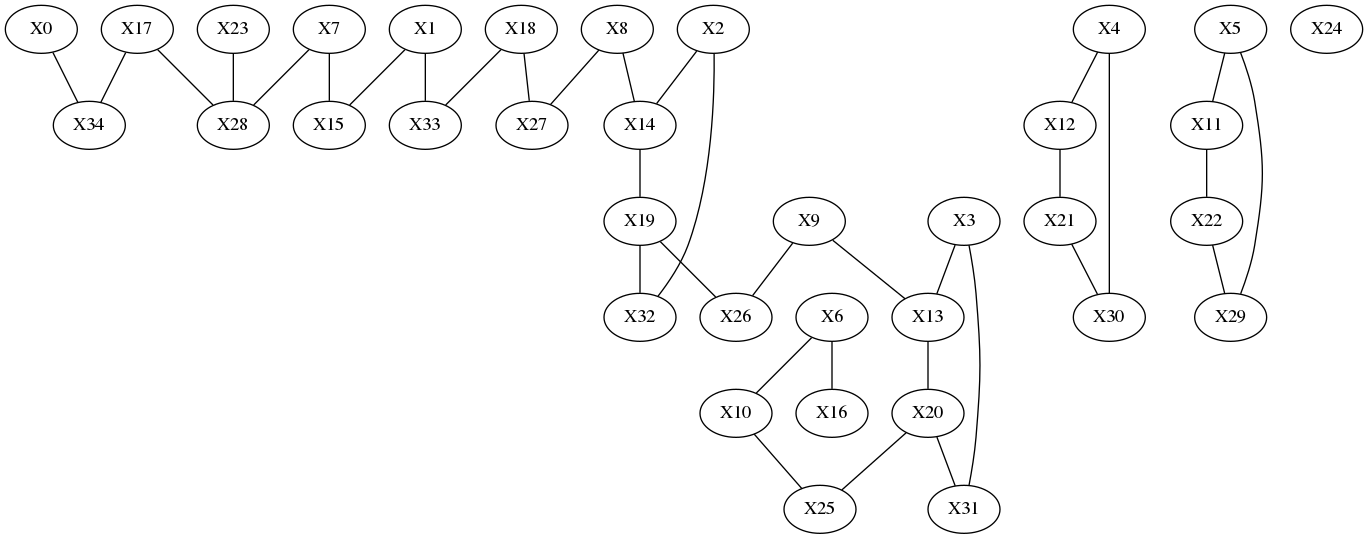

In [32]:
# Plot dependency graph

filename = 'dependency_graph.dot'
model.write_graph(filename, True)

dotfile_to_png(filename)
dotfile_to_pdf(filename)

filename = re.sub(r"dot$","png",filename)

Image(filename=filename,width=600)

Tree width: 2


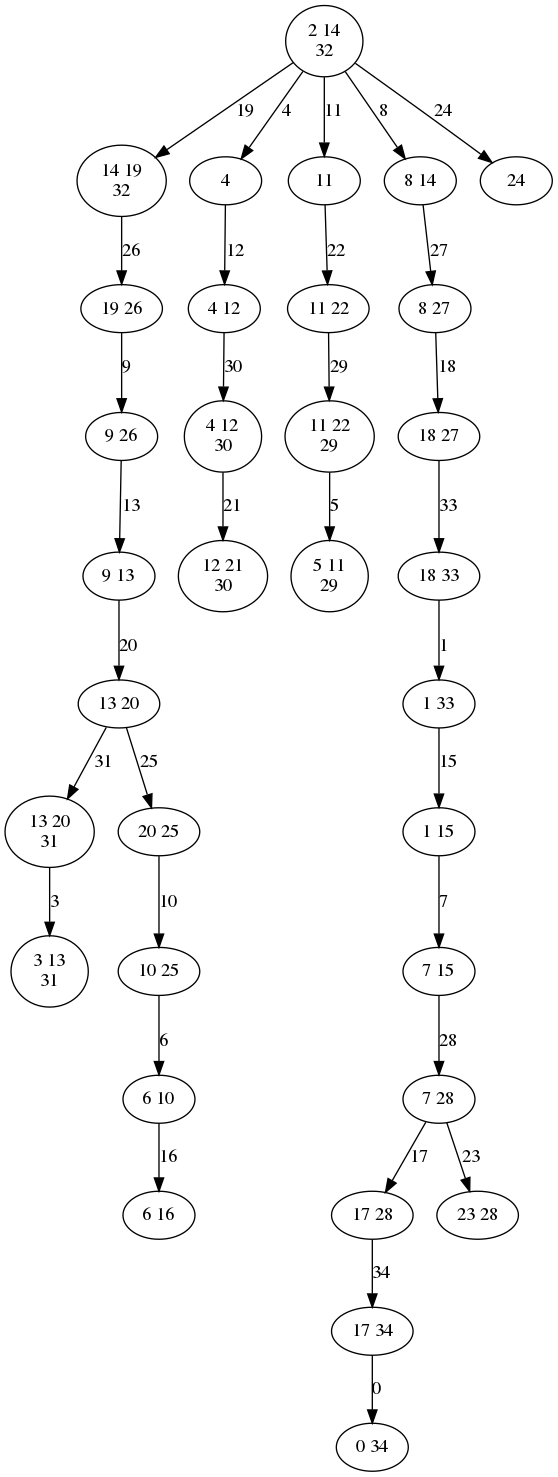

In [33]:
# Plot tree decomposition
sampler = Sampler(model)
print(f"Tree width: {sampler.treewidth()}")
filename="treedecomp"
sampler.plot_td(filename,'png')
sampler.plot_td(filename,'pdf')
sampler.plot_td(filename+".dot",'dot')
Image(filename=filename+".png",width=300)

# Negative design by sampling

In [34]:
target = targets[0]
n = len(target)

In [35]:
def design_model(target):
    n = len(target)
    bps = parse(target)
    model = Model(n, 4)
    model.add_constraints(BPComp(i, j) for (i, j) in bps)
    model.add_functions([GCCont(i) for i in range(n)], 'gc')
    model.add_functions([BPEnergy(i, j, (i-1, j+1) not in bps)
        for (i,j) in bps], 'energy')
    
    model.set_feature_weight(-1.5, 'energy')
    
    return model

def is_mfe_design(seq,target):
    fc = RNA.fold_compound(seq)
    mfe = fc.mfe()[0]
    return target == mfe

In [36]:
def target_frequency(seq,target):
    fc = RNA.fold_compound(seq)
    fc.pf()
    return fc.pr_structure(target)

In [37]:
# solve by direct sampling
sampler = Sampler(design_model(target))
sampler.set_target(0.7 * n, 0.1 * n, 'gc' )

for i in range(50):
    seq = ass_to_seq(sampler.sample())
    if is_mfe_design(seq,target):
        print(f"{i} {seq}")

1 GCCGCGCGCUCCAGGUGGUGUCUCUGCACCGCGGC
5 CGCACUGCGCCCUGCGCCCCGACCUCGGGGGUGCG
7 GGGGCCCCACAUGGUGGGCCGACUCCGGCGGCCCC
12 GGGUCCAUCUACAAGAUGGGCACACGCCCGGGCCC
14 CUUCCGCCUGAAUCGGGGGGCUAUGGCCCUGGAAG
20 CGCGGCGGCCCCAGGCCCGCCAUUUGGUGGCCGUG
25 CCUCUUCGCGAGUCGCGGAGCGCACGCUCAAGAGG
27 UCUGGGAGCCAGGGGCUGCCCGGGAGGGCCCCGGA
31 CGGGGCCCGGGGACCGGGACGUACCCGUCGCCCCG
34 CCCCCCGGGCUAUGCCCCGCCGUGUGGCGGGGGGG
39 CGCGCCUCGAAAAUCGGGCGUGUAAGCGCGGCGCG
42 CACGGGCCGGACGCCGGCCCCGAUUGGGGCCCGUG
44 CCGGUCGGGAUACUCCCGCCGACAGCGGCGACCGG
48 CUGCCCGGCCCCUGGCCGCGGGUUUCUGCGGGCGG


In [38]:
sampler = Sampler(design_model(target))
sampler.set_target(0.7 * n, 0.1 * n, 'gc' )

best = 0
for i in range(100):
    seq = ass_to_seq(sampler.sample())
    freq = target_frequency(seq,target)
    if freq > best:
        best = freq
        print(f"{i} {seq} {freq:.6f} {is_mfe_design(seq,target)}")

0 UGCGGGCCCGUUACGGGCGCCGAUUGGCGCCCGCA 0.015679 False
1 GCGCCCCUCCAUUGGGGGGCCGGUUGGCCGGGCGU 0.572836 True
6 CCUCGGGGGCACUGCCCGCCCGCAGGGGCCCGGGG 0.897433 True


## Disruptive base pairs - RNAPOND-like negative design

In [45]:
## a slightly harder instance
# target = "(((((.((((((.((((((.((((((.((((((.((((((....((((((......)))))).)))))).(((((...(((((((...)))))))))))).)))))).((((((((((((...)))))))...))))).))))))....))))))....))))))....)))))" #Eterna100 39
target = "..(((..((((.....)))).((...(((.....)))...))...))).."

n = len(target)
bps = parse(target)

In [52]:
# Draw base pair count matrix given counter, structure, and disruptive base pair list

def draw_heatmap(counter, bps, dbps):
    # Initial count matrix
    counts = [[0 for i in range(n)] for i in range(n)]
    for bp, count in counter.items():
        counts[bp[0]][bp[1]] = count
    plt.imshow(counts)
    plt.show()

50 2
100 4
150 6
200 8
250 10
300 12
350 14
400 16
FOUND 420 UGCCAAACGGCACUACGCCGAGCUCGCCCCAACCGGGAAUGCACAUGGAC


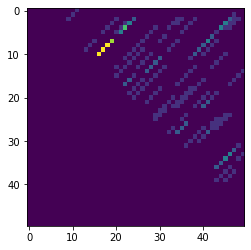

In [49]:
disruptive = []
found = False
steps = 50

total = 0
from collections import Counter
while not found:
    counter = Counter()
    
    model = design_model(target)
    model.add_constraints(NotBPComp(i, j) for (i, j) in disruptive)

    sampler = Sampler(model, lazy=True)
#     sampler.set_target(0.7 * n, 0.1 * n, 'gc' )

    tw = sampler.treewidth()
    if tw > 10 or not sampler.is_consistent():
        disruptive.pop()
        continue
    
    samples = sampler.targeted_samples()
    
    for i,sample in enumerate(samples):
        if i>=steps: break
        total += 1
        seq = ass_to_seq(sample)
        fc = RNA.fold_compound(seq)
        mfe = fc.mfe()[0]
        if mfe == target:
            print("FOUND",total,seq)
            found = True
            break
        counter.update(parse(mfe))
    draw_heatmap(counter, None, None)
    if found: break
    new_dbps = [x[0] for x in counter.most_common() if x[0] not in bps]
    if len(new_dbps)>=2:
        disruptive.extend(new_dbps[:2])
    print(total,len(disruptive))

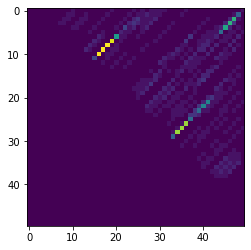

50 2


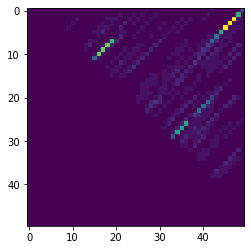

100 4


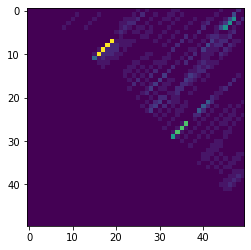

150 6


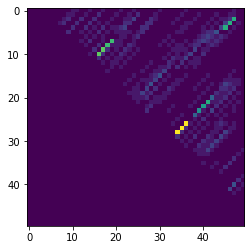

200 8


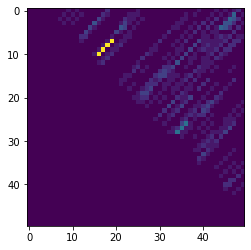

250 10


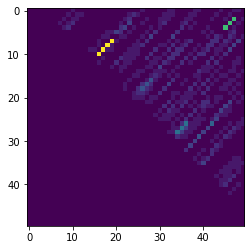

300 12


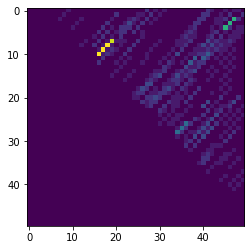

350 14


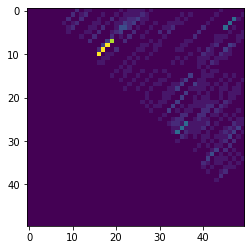

400 16


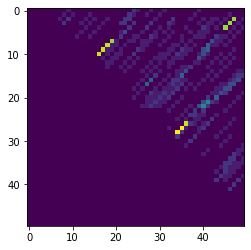

450 18
FOUND 484 UCUGCCAGCCCUCUUUGGGCAUCGGGGCGAUGGACGCAUAGAAUAGCAAA


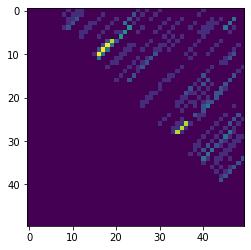

In [60]:
disruptive = []
found = False
steps = 100

total = 0
records = []
from collections import Counter
while not found:
    counter = Counter()
    bp_dist = []
    
    model = design_model(target)
    model.add_constraints(NotBPComp(i, j) for (i, j) in disruptive)

    sampler = Sampler(model, lazy=True)
    sampler.set_target(0.5 * n, 0.1 * n, 'gc' )

    tw = sampler.treewidth()
    if tw > 10 or not sampler.is_consistent():
        disruptive.pop()
        continue
    
    samples = sampler.targeted_samples()
    
    for i,sample in enumerate(samples):
        if i>=steps: break
        total += 1
        seq = ass_to_seq(sample)
        fc = RNA.fold_compound(seq)
        mfe = fc.mfe()[0]
        bp_dist.append(RNA.bp_distance(target, mfe))
        if mfe == target:
            print("FOUND",total,seq)
            found = True
#             break
        counter.update(parse(mfe))
#     draw_heatmap(counter, bps, disruptive, steps=steps)
    

    if found:
        records.append((counter, disruptive[:], [], bp_dist[:]))
        break
    new_dbps = [x[0] for x in counter.most_common() if x[0] not in bps]
    if len(new_dbps)>=2:
        records.append((counter, disruptive[:], new_dbps[:2], bp_dist[:]))
        disruptive.extend(new_dbps[:2])
        
    print(total,len(disruptive))


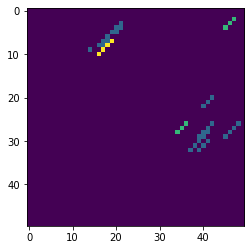

In [56]:
import matplotlib.patches as patches
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

tick = list(range(0,n,5))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)


def draw_heatmap(ax, counter, bps, dbps, new_dbps, steps=0, cbar=True):
    # Initial count matrix
    counts = np.zeros((n,n))
    mask = np.tri(counts.shape[0], k=-1)
    for bp, count in counter.items():
        counts[bp[0]][bp[1]] = count
#     counts = np.ma.array(counts, mask=mask)
    if steps:
        counts = counts/steps

    sns.heatmap(counts, vmax=vmax/steps, mask=mask, square=True, cmap=cmap, ax=ax, cbar=cbar)
    for i, j in bps:
        ax.add_patch(patches.Rectangle((j,i), 1, 1, fc="none", ec="blue", lw=1))
    for i, j in dbps:
        ax.add_patch(patches.Rectangle((j,i), 1, 1, fc="none", ec="red", lw=1))
    for i, j in new_dbps:
        ax.add_patch(patches.Rectangle((j,i), 1, 1, fc="none", ec="green", lw=1))


In [ ]:
# to_draw = [records[i] for i in [0,len(records)//2,-1]]
to_draw = [records[i] for i in [0, 1, -1]]

vmax = max(map(lambda t: max(t[0].values()), to_draw))

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(27,7))
fig.tight_layout()
for i in range(3):
    ax = axs[i]
    counter, disruptive, new_dbps, bp_dist = to_draw[i]
    draw_heatmap(ax,counter, bps, disruptive, new_dbps, steps=steps, cbar=i==2)
    ax.xaxis.tick_top()
    ax.yaxis.tick_right()
    ax.set_xticks(tick)
    ax.set_xticklabels(tick)
    ax.set_yticks(tick)
    ax.set_yticklabels(tick)
axs[0].set_title('First Round', y=-0.01)
axs[1].set_title('Second Round', y=-0.01)
axs[2].set_title('Final Round', y=-0.01)

plt.savefig('count_matrix.pdf', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
dist = [rec[3] for rec in [records[0], records[2], records[-1]]]
labels = list(range(len(records)))
plt.hist(dist, label=labels, alpha=1)
plt.legend()
plt.show()

# Negative design optimization with resampling

In [ ]:
## define multi-target design model for resampling of subsets 
def multi_design_model(targets,subset=None,solution=None):
    n = len(targets[0])
    model = Model(n, 4)
    if subset is None: subset = set(range(n))

    # fix the entries outside of subset from solution
    for i in range(n):
        if i not in subset:
            value = solution.values()[i]
            model.restrict_domains(i,(value,value))

    model.add_functions([GCCont(i) for i in range(n) if i in subset], 'gc')
    
    for target in targets:
        bps = parse(target)
        bps = [(i,j) for (i,j) in bps if i in subset or j in subset]
        model.add_constraints(BPComp(i, j) for (i, j) in bps)
        model.add_functions([BPEnergy(i, j, (i-1, j+1) not in bps)
            for (i,j) in bps], 'energy')
    
    model.set_feature_weight(-1, 'energy')
    model.set_feature_weight(-0.3, 'gc')
    
    return model

In [ ]:
def multi_defect(sequence, targets, xi=1):
    k = len(targets)
    fc = RNA.fold_compound(sequence)
    ee = fc.pf()[1]
    eos = [fc.eval_structure(target) for target in targets]
    diff_ee = sum(1/k * (eos[i] - ee) for i in range(k))
    diff_targets = sum(2/(k*(k-1)) * abs(eos[i]-eos[j])
        for i in range(k) for j in range(k) if i<j)
    return diff_ee + xi * diff_targets

In [ ]:
import random
def optimize(create_model, objective, steps, temperature):
    model = create_model(None, None)
    cur = Sampler(model).sample()
    curval = objective(ass_to_seq(cur))

    ccs = model.connected_components()
    weights = [1/len(cc) for cc in ccs]
    
    bestval = math.inf
    for i in range(steps):
        cc = random.choices(ccs,weights)[0]
        new = Sampler(create_model(cc, cur)).sample()
        newval = objective(ass_to_seq(new))
        
        if newval <= curval or random.random() <= math.exp( - ( newval - curval ) / temperature ) :
            cur, curval = new, newval      
            if curval < bestval:
                best,bestval = cur, curval
                
    return (ass_to_seq(best), bestval)

In [ ]:
def optimize_md(targets):
    opt = optimize(lambda ss, sol: multi_design_model(targets, ss, sol),
                      lambda seq: multi_defect(seq, targets, xi = 1),
                      1000, 0.015)

    fc = RNA.fold_compound(opt[0])
    print(opt, fc.mfe(),
          [fc.eval_structure(t) for t in targets],
          f'{100*sum(x in "GC" for x in opt[0])/len(opt[0]):0.2f}%'
    )

import timeit
timeit.repeat(lambda:optimize_md(targets), repeat=100, number=1)

In [ ]:
# good solutions for the running 3-target example

seq = "AGGGUCCGGGGGGCCCGGGGGUUGACCCCGACCCU" # all mfe; GC 65.7% (1000 steps; ~6s)
seq = "GGGGCCCGGGGGGCCCGGGGGUUGACCCCGGCCCC"
seq = "CCCCUUGCCUCAAGGGCCCUCUUCAGAGGAAGGGG"
fc = RNA.fold_compound(seq)
print(fc.mfe())
print(fc.pf())
print([fc.eval_structure(t) for t in targets])
print([fc.pr_structure(t) for t in targets])
print(multi_defect(seq,targets,xi=1))

In [ ]:
#01234567890123456789012345678901234
#GGGGCCCGGGGGGCCCGGGGGUUGACCCCGGCCCC